<a href="https://colab.research.google.com/github/Miriamdti/Big_Data/blob/main/mmcl_pred_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predecir sobrevivientes del Titanic

Miriam Maray Carreño León

En esta práctica se llevara a cabo un proceso de machine learning aplicado a los datos "Titanic: Machine Learning Form Desaster" con la finalidad de predecir los sobrevivientes del hundimiento del titanic en 1912, data set obtenido de https://www.kaggle.com/c/titanic

Para este práctica se llevaran a cabo los siguientes pasos:


> *   Analizar los datos
*   Preparar los datos
*   Hacer predicciones
*   Mejorar los resultados









Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score


Obteniendo la BD

In [2]:
#Se importan los datos a utilizar de la web
url_test = 'https://raw.githubusercontent.com/Miriamdti/Big_Data/main/test.csv'
url_train = 'https://raw.githubusercontent.com/Miriamdti/Big_Data/main/train.csv'
titanicTest = pd.read_csv(url_test)
titanicTrain = pd.read_csv(url_train)

>Se hace una inspección rápida del contenido de cada conjunto de datos.



In [3]:
print("Train", titanicTrain.shape)
print("Test", titanicTest.shape)

Train (891, 12)
Test (418, 11)


In [4]:
titanicTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanicTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
titanicTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanicTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## **Analizando los datasets**

> Analizando ambos conjuntos de datos, se puede apreciar que el dataset de train tiene una columna de más "Survived" que es la que indica si el tripulante sobrevive o no, con este dataset se evalua los modelos mas adelante.
> Las columnas de "sexo" y "edad" son variables de gran importancias, ya que daban prioridad a mujeres y niños.
> La columna "Cabin" debe eliminarse ya que cuenta con muchos valores Null.








****
> ###  Analizando el comportamiento de la variable a predecir "Survived"





In [8]:
titanicTrain.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [9]:
titanicTrain['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

>El resultado indica que tan solo sobrevivieron 342 personas de 891 que iban a bordo, como lo muestra la siguiente gráfica.



Text(0.5, 1.0, 'Sobrevivientes')

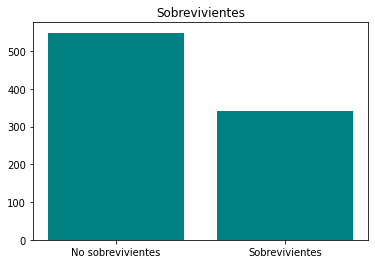

In [10]:
noSobrevivientes = titanicTrain.Survived[titanicTrain.Survived ==0].count()
sobrevivientes = titanicTrain.Survived[titanicTrain.Survived ==1].count()
plt.bar(['No sobrevivientes', 'Sobrevivientes'], [noSobrevivientes, sobrevivientes],color='teal')
plt.title('Sobrevivientes')

Text(0.5, 1.0, 'Sobrevivientes')

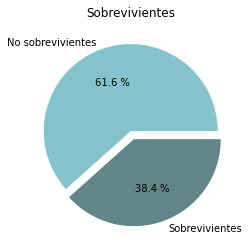

In [11]:
colores=["#84c3cb","#61868a"]
desfase=(0,0.1)
plt.pie(titanicTrain.Survived.value_counts(),labels=['No sobrevivientes', 'Sobrevivientes'], autopct="%0.1f %%", colors=colores,explode=desfase)
plt.title('Sobrevivientes')

>Este es el porcentaje de sobrevivientes, de esta cantidad de sobrevivientes cual es la cantidad de mujeres que sobrevivieron:

In [12]:
#ver etiquetas
titanicTrain.Sex.head() 

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [13]:
titanicTrain.Survived[(titanicTrain.Survived == 1)&(titanicTrain.Sex.str.contains('female'))].count()

233



> De un total de **342** sobrevivientes, **233** son mujeres y el restante hombres, como lo muestra la siguiente gráfica



Text(0.5, 1.0, 'Hombres y mujeres sobrevivientes')

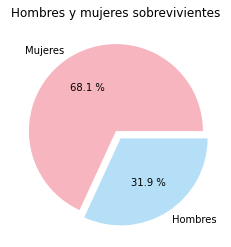

In [14]:
colores=["#f7b5c0","#b5dff7"]
desfase=(0,0.1)
plt.pie([233,109], labels=['Mujeres','Hombres'],autopct="%0.1f %%" , colors=colores,explode=desfase)
plt.title('Hombres y mujeres sobrevivientes')



> Con la gráfica se puede visualizar que el **68.1%** de los sobrevivientes eran mujeres y el **31.9%** eran hombres, igual que en la siguiente gráfica de barras:



Text(0.5, 1.0, 'Sobrevivientes')

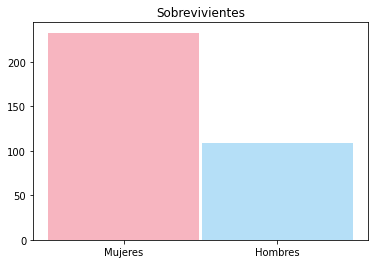

In [15]:
colores=["#f7b5c0","#b5dff7"]
plt.bar(['Mujeres','Hombres'], [233, 109], width=0.98, color=colores)
plt.title('Sobrevivientes')



> Conociendo el porcentaje de mujeres y hombres sobrevivientes, veamos la edad ante la columna "Survived", primero se analiza las edades en el dataset de entrenamiento.



In [16]:
titanicTrain['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

> En esta descripción de la columna edad se visualiza la edad mínima 0 años, edad máxima 80 años y la edad media de 29.



(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

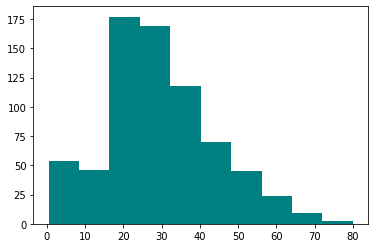

In [17]:
plt.hist(titanicTrain['Age'],color='teal')

> Con esta gráfica se visualiza que en el Titanic viajaba una mayor cantidad de niños que de adultos mayores, y la mayor cantidad de personas a bordo estaban entre los 20 y 30 años.

> Cantidad de personas menores de 20 años que sobreviven y las que no:

In [18]:
#164 menores de 20 años
menores = titanicTrain[titanicTrain.Age < 20] 
menores

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S


In [19]:
#de 164 personas menores de 20, 79 sobrevivieron
menores.Survived[menores.Survived == 1].count() 

79

In [20]:
#de 164 personas menores de 20 años, 85 no sobrevivieron.
menores.Survived[menores.Survived == 0].count() 

85



> Ahora con las personas mayores de 60 años.



In [21]:
#26 personas tienen una edad igual o mayor a 60 años
mayores = titanicTrain[titanicTrain.Age >= 60] 
mayores

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C


In [22]:
#7 de las 26 personas mayores sobrevivieron
mayores.Survived[mayores.Survived == 1].count()

7

In [23]:
#19 de las 26 personas mayores no sobreviven
mayores.Survived[mayores.Survived == 0].count() 

19

> Analizando la columna edad, se observa cuantas personas tienen una edad entre 20 y 30 años. 

In [24]:
#245 personas tienen una edad entre 20 y 30 años
media = titanicTrain[(titanicTrain.Age >= 20) & (titanicTrain.Age <= 30)] 
media

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [25]:
#87 de las 245 personas de edad media sobreviven
media.Survived[media.Survived == 1].count() 

87

In [26]:
#158 de las 245 personas de edad media No sobreviven
media.Survived[media.Survived == 0].count() 

158

>Analizar la columna "Pclass", que toma relevancia ante la mortandad del accidente.



In [27]:
titanicTrain['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Distribución de clases en el barco')

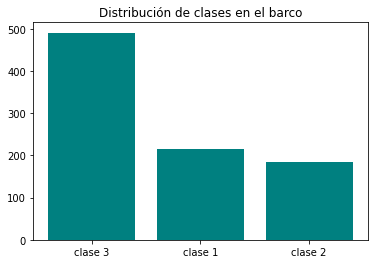

In [28]:
plt.bar(['clase 3', 'clase 1', 'clase 2'],titanicTrain['Pclass'].value_counts(),color='teal')
plt.title('Distribución de clases en el barco')



> Con esta gráfica se observa que la clase 3 es un poco más del doble que la clase 1, mientras que la clase 2 es ligeramente menor en tamaño que la clase 1.





>Mortandad en cada clase



Text(0.5, 1.0, 'Distribución de muerte en primera clase')

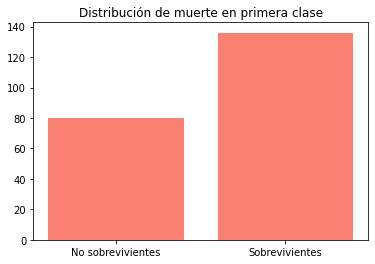

In [33]:
#Observación de primera clase
classSobre = titanicTrain.Survived[(titanicTrain.Survived == 1)&(titanicTrain.Pclass == 1)].count()
classNoSobre = titanicTrain.Survived[(titanicTrain.Survived == 0)&(titanicTrain.Pclass == 1)].count()
plt.bar(['No sobrevivientes', 'Sobrevivientes'], [classNoSobre,classSobre],color='salmon')
plt.title('Distribución de muerte en primera clase')

Text(0.5, 1.0, 'Distribuación de muerte en primera clase')

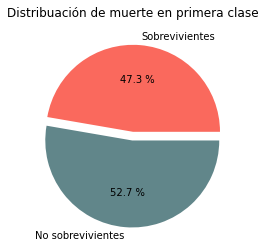

In [44]:
colores=["#fa695d","#61868a"]
desfase=(0,0.1)
plt.pie([classSobre, classNoSobre], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%", colors=colores,explode=desfase)
plt.title('Distribuación de muerte en primera clase')

Text(0.5, 1.0, 'Distribuación de muerte en segunda clase')

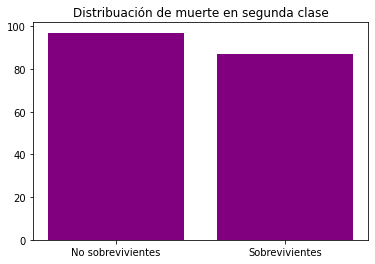

In [40]:
#Observación de segunda clase
classSobre = titanicTrain.Survived[(titanicTrain.Survived == 1)&(titanicTrain.Pclass == 2)].count()
classNoSobre = titanicTrain.Survived[(titanicTrain.Survived == 0)&(titanicTrain.Pclass == 2)].count()
plt.bar(['No sobrevivientes', 'Sobrevivientes'], [classNoSobre,classSobre], color='purple')
plt.title('Distribuación de muerte en segunda clase')

Text(0.5, 1.0, 'Distribuación de muerte en segunda clase')

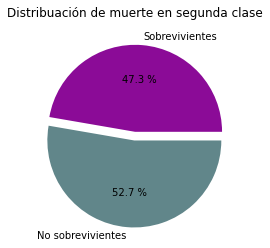

In [45]:
colores=["#8b0b97","#61868a"]
desfase=(0,0.1)
plt.pie([classSobre, classNoSobre], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%" , colors=colores,explode=desfase)
plt.title('Distribuación de muerte en segunda clase')

Text(0.5, 1.0, 'Distribuación de muerte en tercera clase')

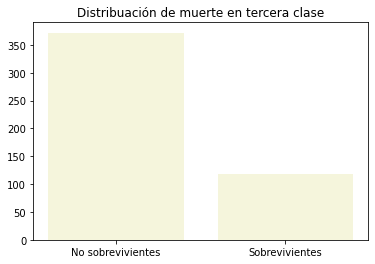

In [53]:
#Observación de tercera clase
classSobre = titanicTrain.Survived[(titanicTrain.Survived == 1)&(titanicTrain.Pclass == 3)].count()
classNoSobre = titanicTrain.Survived[(titanicTrain.Survived == 0)&(titanicTrain.Pclass == 3)].count()
plt.bar(['No sobrevivientes', 'Sobrevivientes'], [ classNoSobre, classSobre], color='beige')
plt.title('Distribuación de muerte en tercera clase')

Text(0.5, 1.0, 'Distribuación de muerte en tercera clase')

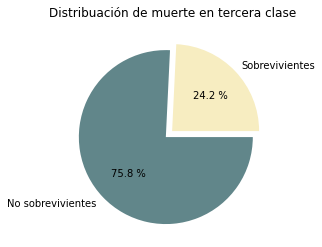

In [55]:
colores=["#f7edc1","#61868a"]
desfase=(0,0.1)
plt.pie([classSobre, classNoSobre], labels=['Sobrevivientes', 'No sobrevivientes'],autopct="%0.1f %%", colors=colores,explode=desfase )
plt.title('Distribuación de muerte en tercera clase')




> Observando las gráficas, la **primera clase** tuvo una gran cantidad de **sobrevivientes** **(63%)** en comparación con las otras clases.
Mientras en la **3a clase** solo sobrevivió un **24.2%** de la tripulación, considerando la cantidad de personas de la 3a clase era más del doble que los de la primera clase.








> Observando el resto de las columnas



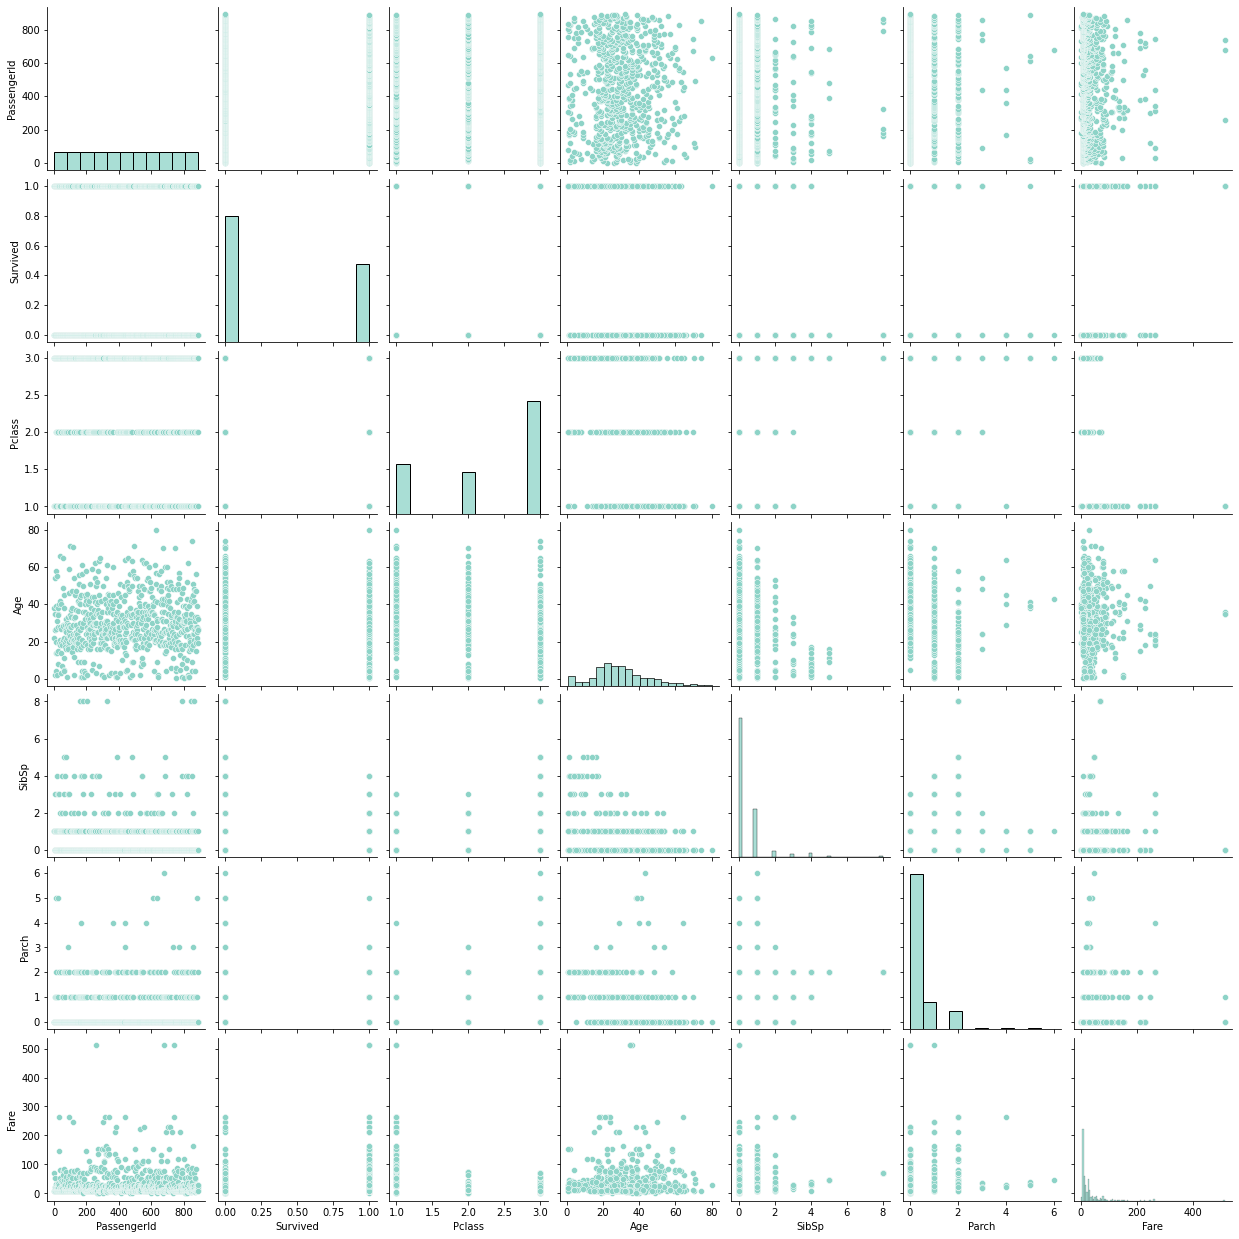

In [59]:
sns.set_palette("Set3")
sns.pairplot(titanicTrain)



> En este gráfico se observan otras de las variables numéricas por explorar.
La columna "sibps" que representa el número de hermanos o cónyuges a bordo, en su mayoría tiene números bajos, lo cual indica que existían pocas personas con ese tipo de parentesco.
La columna "Parch" que representa el número de padres e hijos a bordo, en su mayoría tiene números bajos.
La columna "Fare" que representa la tarifa de pasajero, tiene números muy bajos, debido a que la gran mayoría de la tripulación era de la 3a clase.



> Observando las columnas Cabin, Embarked y Ticket



In [60]:
titanicTrain[['Cabin','Ticket','Embarked']]

,Cabin,Ticket,Embarked
0,NaN,A/5 21171,S
1,C85,PC 17599,C
2,NaN,STON/O2. 3101282,S
3,C123,113803,S
4,NaN,373450,S
...,...,...,...
886,NaN,211536,S
887,B42,112053,S
888,NaN,W./C. 6607,S
889,C148,111369,C


In [61]:
#La columna Cabin
titanicTrain['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [62]:
#Valores nulos en la columna Cabin
titanicTrain['Cabin'].isnull().sum()

687



> De un total de **891 registros** de la columna Cabin, **687** son **valores nulos**, lo que significa que sera necesario eliminarla debido a su cantidad de datos vacios.



In [63]:
titanicTrain.drop('Cabin', axis = 1, inplace=True)
titanicTest.drop('Cabin', axis = 1, inplace=True)

In [64]:
# La columna Ticket
titanicTrain['Ticket'].value_counts()



347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [65]:
#Valores nulos en la columna Ticket
titanicTrain['Ticket'].isnull().sum()

0



> La columna Ticket tiene sus registro completos



In [66]:
# La columna Embarked
titanicTrain['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [67]:
#Valores nulos en la columna Embarked
titanicTrain['Embarked'].isnull().sum()

2



> La columna "Embarked" tiene solo dos registros faltantes que no representan ningún problema. Se pueden eliminar esas dos filas o llenarlas con el promedio de la embarcación.
En la columna "Embarked", se distigue entre e embarcaciones S, C y Q
Surge la pregunta ¿Es un factor para la sobrevivencia de los tripulantes?



> Representación de la mortandad en cada una de las embarcaciones S, C y Q



Text(0.5, 1.0, 'Mortalidad de la embarcación S')

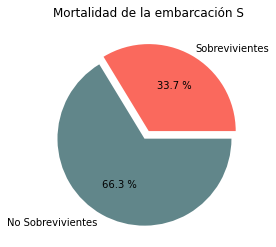

In [68]:
#Embarked S
colores=["#fa695d","#61868a"]
desfase=(0,0.1)
sobrevivientes = titanicTrain.Embarked[(titanicTrain.Survived == 1) & (titanicTrain.Embarked.str.contains('S'))].count()
noSobrevivientes = titanicTrain.Embarked[(titanicTrain.Survived == 0) & (titanicTrain.Embarked.str.contains('S'))].count()
plt.pie([sobrevivientes, noSobrevivientes],labels=['Sobrevivientes', 'No Sobrevivientes'],autopct="%0.1f %%",  colors=colores,explode=desfase)
plt.title('Mortalidad de la embarcación S')

Text(0.5, 1.0, 'Mortalidad de la embarcación C')

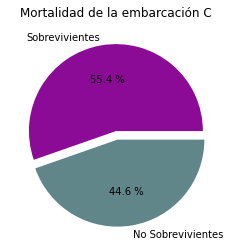

In [69]:
#Embarked C
colores=["#8b0b97","#61868a"]
desfase=(0,0.1)
sobrevivientes = titanicTrain.Embarked[(titanicTrain.Survived == 1) & (titanicTrain.Embarked.str.contains('C'))].count()
noSobrevivientes = titanicTrain.Embarked[(titanicTrain.Survived == 0) & (titanicTrain.Embarked.str.contains('C'))].count()
plt.pie([sobrevivientes, noSobrevivientes],labels=['Sobrevivientes', 'No Sobrevivientes'],autopct="%0.1f %%", colors=colores,explode=desfase)
plt.title('Mortalidad de la embarcación C')

Text(0.5, 1.0, 'Mortalidad de la embarcación Q')

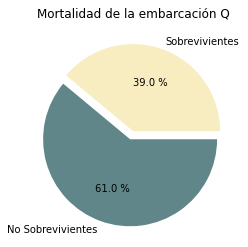

In [70]:
#Embarked Q
colores=["#f7edc1","#61868a"]
desfase=(0,0.1)
sobrevivientes = titanicTrain.Embarked[(titanicTrain.Survived == 1) & (titanicTrain.Embarked.str.contains('Q'))].count()
noSobrevivientes = titanicTrain.Embarked[(titanicTrain.Survived == 0) & (titanicTrain.Embarked.str.contains('Q'))].count()
plt.pie([sobrevivientes, noSobrevivientes],labels=['Sobrevivientes', 'No Sobrevivientes'],autopct="%0.1f %%", colors=colores,explode=desfase)
plt.title('Mortalidad de la embarcación Q')



> Con estas gráficas se puede visualizar la mortalidad correspondiente a cada embarcación. A simple vista se puede ver que la mortalidad en cada una de ellas se da de manera común, por lo tanto no hay indicio de que pertenecer a cierta embarcación influyera en sobrevivir o no al hundimiento del barco.





> Las columnas "**PassengerId**", "**Name**" y "**Ticket**" se descartan ya que estas columnas tipo object dificilmente se pueden pasar a tipo numérico y además no aportarían nada a los modelos.


In [71]:
titanicTrain.drop(['PassengerId','Name', "Ticket"], axis = 1, inplace = True)
titanicTest.drop(['PassengerId','Name', "Ticket"], axis = 1, inplace = True)

In [72]:
print(titanicTrain)
print(titanicTest)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]
     Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0         3    male  34.5      0      0    7.8292        Q
1         3  female  47.0      1      0   



> Ya se ha visualizado el comportamiento de cada una de las columnas de datos. 
Se observara ahora la correlación de ellas con el target "Survived". Esta correlación solo se puede dar entre variables de tipo numérico, para ello se transformara las variables "Sex" y "Embarked".



In [73]:
#conjunto de train
titanicTrain['Sex'].replace(['male','female'],[0,1], inplace = True)
titanicTrain['Embarked'].replace(['S','C','Q'],[1,2,3], inplace = True)

#conjunto de test
titanicTest['Sex'].replace(['male','female'],[0,1], inplace = True)
titanicTest['Embarked'].replace(['S','C','Q'],[1,2,3], inplace = True)

In [74]:
titanicTrain

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0
4,0,3,0,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1.0
887,1,1,1,19.0,0,0,30.0000,1.0
888,0,3,1,NaN,1,2,23.4500,1.0
889,1,1,0,26.0,0,0,30.0000,2.0


In [75]:
titanicTest

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,3
1,3,1,47.0,1,0,7.0000,1
2,2,0,62.0,0,0,9.6875,3
3,3,0,27.0,0,0,8.6625,1
4,3,1,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,0,NaN,0,0,8.0500,1
414,1,1,39.0,0,0,108.9000,2
415,3,0,38.5,0,0,7.2500,1
416,3,0,NaN,0,0,8.0500,1




> Cuadro de correlación



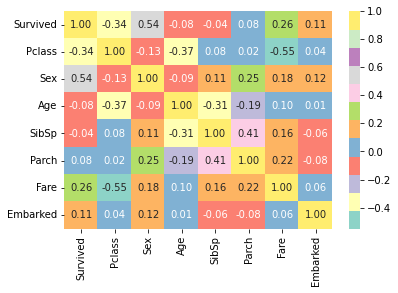

In [84]:
corr = titanicTrain.corr()
sns.heatmap(corr, cmap='Set3', annot=True, fmt=".2f")

>Porcentajes ordenados de manera descendente:

In [85]:
corr[['Survived']].sort_values(by = 'Survived',ascending = False)

,Survived
Survived,1.000000
Sex,0.543351
Fare,0.257307
Embarked,0.108669
Parch,0.081629
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481




> Como se puede observar, los coeficientes de correlación con respecto al target "Survived" son demasiado bajos, sin embargo se puede trabajar con ellos.
La puntuación más alta es la de "Sex" que corresponde a un 54% de correlación, por tal motivo se necesita esa columna para entrenar a los algoritmos.
La columna "Fare" es la puntuación más alta por debajo de la columna "Sex" con un 25% de correlación. En la intersección de las columnas "Fare" y "Pclass" se puede ver una relación negativa de un 55%, lo que indica que en esa medida las dos columnas representan lo mismo y una de las dos es innecesaria. Por tal motivo se elimina la columna "Fare" y se queda la coumna "Pclass" ya que tiene mayor relación con la columna "Survived".
La columna "Embarked" tiene un 10% de relación.
Por último se eliminan las columnas "Parch" y "SipSp", ya que tener los lazos familiares no aportara a la sobrevivencia de una persona. Se mantiene la columna "Age" a pesar de tener una correlación tan baja, ya que se debió tener mayor prioridad en salvar niños que a personas adultas.



### > Los conjuntos de datos quedan de la siguiente manera:

In [86]:
titanicTrain = titanicTrain.loc[:,['Sex','Pclass','Age','Embarked','Survived']]
titanicTest = titanicTest.loc[:,['Sex','Pclass','Age','Embarked']]
titanicTrain, titanicTest

(     Sex  Pclass   Age  Embarked  Survived
 0      0       3  22.0       1.0         0
 1      1       1  38.0       2.0         1
 2      1       3  26.0       1.0         1
 3      1       1  35.0       1.0         1
 4      0       3  35.0       1.0         0
 ..   ...     ...   ...       ...       ...
 886    0       2  27.0       1.0         0
 887    1       1  19.0       1.0         1
 888    1       3   NaN       1.0         0
 889    0       1  26.0       2.0         1
 890    0       3  32.0       3.0         0
 
 [891 rows x 5 columns],      Sex  Pclass   Age  Embarked
 0      0       3  34.5         3
 1      1       3  47.0         1
 2      0       2  62.0         3
 3      0       3  27.0         1
 4      1       3  22.0         1
 ..   ...     ...   ...       ...
 413    0       3   NaN         1
 414    1       1  39.0         2
 415    0       3  38.5         1
 416    0       3   NaN         1
 417    0       3   NaN         2
 
 [418 rows x 4 columns])

> Una vez realizado el análisis y seleccionado  las características, se continua a la etapa de preprocesamiento de datos.

## **Preparar los datos**

En esta etapa se suele hacer el siguiente preprocesamiento:


> 1. Transformar variables categóricas a numéricas.
2. Tratar los datos faltantes.
3. Tratar los datos atípicos.
4. Considerar el escalado de los datos.


1. Para este punto no se realizara ninguna transformación ya que en el proceso de análisis se transformaron las columnas necesarias para la observación y ahora todo el conjunto de datos es de tipo numérico.
2. **Tratar los datos faltantes**. En este punto se analizara cada columna para ver la cantidad de datos que faltan en cada una de ellas y como tratarlos.

In [88]:
print(titanicTrain['Sex'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento
print(titanicTest['Sex'].isnull().sum())#Cantidad de valores vacíos en test

0
0


In [89]:
print(titanicTrain['Pclass'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento
print(titanicTest['Pclass'].isnull().sum())#Cantidad de valores vacíos en test

0
0


In [90]:
print(titanicTrain['Age'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento 
print(titanicTest['Age'].isnull().sum()) #Cantidad de valores vacíos en test

177
86


In [91]:
print(titanicTrain['Embarked'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento 
print(titanicTest['Embarked'].isnull().sum()) #Cantidad de valores vacíos en test

2
0


In [92]:
print(titanicTrain['Survived'].isnull().sum()) #Cantidad de valores vacíos en entrenamiento

0


> Las columnas "Age" y "Embarked" contienen valores vacios y se deben de tratar los datos.
La columna "Age" tiene 177 valores faltantes de 891. Existen diversas formas de rellenar los valores faltantes, para este caso se rellenaran con el valor promedio de edades.



In [93]:
promedio = titanicTrain['Age'].mean()
titanicTrain['Age'].fillna(promedio, inplace = True)
print(titanicTrain['Age'].isnull().sum())

#Ahora con el conjunto de prueba
promedio = titanicTest['Age'].mean()
titanicTest['Age'].fillna(promedio, inplace = True)
print(titanicTest['Age'].isnull().sum())

0
0




> De esta forma se han rellenado los valores vacíos de la columna "Age" con el promedio de edad. Falta la columna "Embarked" el cual tiene 2 resgistros faltantes de 891. Para ese caso se rellenara estos valores vacíos con el número que más se repite.



In [94]:
titanicTrain['Embarked'].value_counts()

1.0    644
2.0    168
3.0     77
Name: Embarked, dtype: int64

In [95]:
titanicTrain['Embarked'].fillna(1, inplace = True)
print(titanicTrain['Embarked'].isnull().sum())

0


In [96]:
print(titanicTrain.info())
print(titanicTest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   Embarked  891 non-null    float64
 4   Survived  891 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 34.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Age       418 non-null    float64
 3   Embarked  418 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 13.2 KB
None




> Ya no se tienen valores vacíos en el datasets, se ha terminado el segundo punto y se puede seguir con el procesamiento de datos.


> 3. **Tratar los datos atípicos**. Para este punto solo se centrara en la columna "Age" ya que las demás columnas son categóricas y no tienen mayor variedad de números, de esta manera no existe riesgo de valores Outliers.







/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


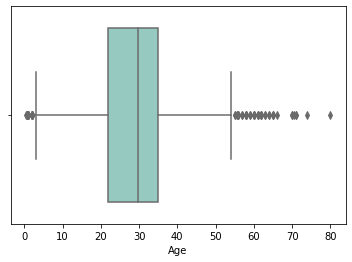

In [98]:
sns.boxplot(titanicTrain['Age'])



> Esta gráfica muestra algunos puntos de análisis, el cuartil inferior que es un poco mayor a 20, la media que es 30 y el cuartil superior que está al rededor de 35. Los bigotes (líneas verticales de los lados) exponen que todo número que esté dentro de estos limites se consideran normales, mientras que los que están por fuera se consideran datos atípicos. Para este caso se consideran datos atípicos las edades inferiores a 3 y superiores a 53 aproximadamente. Dependiendo el caso se deben eliminar esos datos para no afectar el rendimiento de los algoritmos, sin embargo en esta ocasión no es necesario, ya que si es posible que una persona de 70 u 80 años estuviera en el barco, o un bebé de apenas 1 año de edad. Caso contrario sería una persona de 150 o 200 años, o alguien con -3 años, en ese momento si de deberrían eliminar dichos registros ya que es ilógico que un caso así se presente.




> Una vez considerado los Outliers el siguiente paso es de escalado de datos.

> 4. **Considerar el escalado de los datos**. El escalado de los datos se debe realizar cuando existen columnas con diferencias de valores muy altos, como por ejemplo el valor de un departamento y el número de habitaciones de este. El escalado se hace precisamente para reducir esta diferencia y que proporcionen mejores resultados con los algoritmos. En este caso el problema es de clasificación y no se presentan diferencias entre valores de columnas, entonces no es necesario hacer el escalado de datos.





Con esto se ha terminado el preprocesamiento y ya se tienen listos los datos para poder entrenar los modelos de la mejor manera.

In [99]:
titanicTrain

,Sex,Pclass,Age,Embarked,Survived
0,0,3,22.000000,1.0,0
1,1,1,38.000000,2.0,1
2,1,3,26.000000,1.0,1
3,1,1,35.000000,1.0,1
4,0,3,35.000000,1.0,0
...,...,...,...,...,...
886,0,2,27.000000,1.0,0
887,1,1,19.000000,1.0,1
888,1,3,29.699118,1.0,0
889,0,1,26.000000,2.0,1


In [100]:
titanicTest

,Sex,Pclass,Age,Embarked
0,0,3,34.50000,3
1,1,3,47.00000,1
2,0,2,62.00000,3
3,0,3,27.00000,1
4,1,3,22.00000,1
...,...,...,...,...
413,0,3,30.27259,1
414,1,1,39.00000,2
415,0,3,38.50000,1
416,0,3,30.27259,1


## **Hacer predicciones**

En esta etapa se entrenaran los modelos con el datasets previamente procesado y se llevaran a cabo las predicciones. Utilizando modelos de clasificación tales como:

*   Logistic Regression
*   KNN o k-Nearest Neighbors
*   SVM o Support Vector Machine
*   Naive Bayes classifier
*   Decision Tree
*   Random Forrest

Se compararan y se mejoran los resultados.


In [101]:
y_train = titanicTrain.loc[:, 'Survived']
x_train = titanicTrain.drop('Survived', axis = 1)
x_test = titanicTest

In [102]:
#Regresión logistica
from sklearn.linear_model import LogisticRegression #Importar la librería del modelo

clasificador = LogisticRegression(random_state = 0)
clasificador.fit(x_train, y_train) #Entrenar el modelo con los datos de entrenamiento 

y_pred = clasificador.predict(x_test) #Hacer predicciones sobre el conjunto de test

cv = cross_val_score(estimator = clasificador, X = x_train, y = y_train, cv = 10) # metodo para obtener la precisión (Validación cruzada)
cvRegression = cv.mean()
stdRegression = cv.std()
print("promedio Validación cruzada Regresión logística: ", cvRegression)
print('Varianza de Regresión logística: ',stdRegression)

promedio Validación cruzada Regresión logística:  0.7878901373283396
Varianza de Regresión logística:  0.012539826998339465


In [103]:
#KNN o k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier #Importar la librería del modelo

clasificador = KNeighborsClassifier()
clasificador.fit(x_train, y_train) #Entrenar el modelo con los datos de entrenamiento 

y_pred = clasificador.predict(x_test) #Hacer predicciones sobre el conjunto de test

cv = cross_val_score(estimator = clasificador, X = x_train, y = y_train, cv = 10) #metodo para obtener la precisión
cvKnn = cv.mean()
stdKnn = cv.std()
print("promedio Validación cruzada KNN: ", cvKnn)
print('Varianza de KNN: ',stdKnn)

promedio Validación cruzada KNN:  0.7677278401997503
Varianza de KNN:  0.0347735211396166


In [104]:
#SVM o Support Vector Machine
from sklearn.svm import SVC #Importar la librería del modelo
#Para implementar el modelo de SVM es obligatorio tener los datos escalados
from sklearn.preprocessing import StandardScaler #Libreria para escalar los datos

scaler = StandardScaler()
x_entrenamiento = scaler.fit_transform(x_train) #Escalar los datos de entrenamiento
x_prueba = scaler.fit_transform(x_test)

clasificador = SVC(random_state = 0) 
clasificador.fit(x_entrenamiento, y_train) #Entrenar el modelo con los datos de entrenamiento 

y_pred = clasificador.predict(x_prueba) #Hacer predicciones sobre el conjunto de test

cv = cross_val_score(estimator = clasificador, X = x_train, y = y_train, cv = 10) #metodo para obtener la precisión
cvSVM = cv.mean()
stdSVM = cv.std()
print("promedio Validación cruzada SVM: ", cvSVM)
print('Varianza de SVM: ',stdSVM)

promedio Validación cruzada SVM:  0.6352808988764045
Varianza de SVM:  0.0245767093935616


In [105]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB #Importar la librería del modelo

clasificador = GaussianNB()
clasificador.fit(x_train, y_train) #Entrenar el modelo con los datos de entrenamiento 

y_pred = clasificador.predict(x_test) #Hacer predicciones sobre el conjunto de test

cv = cross_val_score(estimator = clasificador, X = x_train, y = y_train, cv = 10) #metodo para obtener la precisión
cvNB = cv.mean()
stdNB = cv.std()
print("promedio Validación cruzada NB: ", cvNB)
print('Varianza de NB: ',stdNB)

promedio Validación cruzada NB:  0.782247191011236
Varianza de NB:  0.02774985200095652


In [106]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier #Importar la librería del modelo

clasificadorTree = DecisionTreeClassifier(random_state = 0)
clasificadorTree.fit(x_train, y_train) #Entrenar el modelo con los datos de entrenamiento 

y_pred = clasificadorTree.predict(x_test) #Hacer predicciones sobre el conjunto de test

cv = cross_val_score(estimator = clasificadorTree, X = x_train, y = y_train, cv = 10) #metodo para obtener la precisión
cvTree = cv.mean()
stdTree = cv.std()
print("promedio Validación cruzada Decision Tree: ", cvTree)
print('Varianza de Decision Tree: ',stdTree)

promedio Validación cruzada Decision Tree:  0.7924719101123595
Varianza de Decision Tree:  0.03751547254759878


In [107]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier #Importar la librería del modelo

clasificadorForest = RandomForestClassifier(random_state = 0)
clasificadorForest.fit(x_train, y_train) #Entrenar el modelo con los datos de entrenamiento 

y_pred = clasificadorForest.predict(x_test) #Hacer predicciones sobre el conjunto de test

cv = cross_val_score(estimator = clasificadorForest, X = x_train, y = y_train, cv = 10) #metodo para obtener la precisión
cvForest = cv.mean()
stdForest = cv.std()
print("promedio Validación cruzada Random Forest: ", cvForest)
print('Varianza de Random Forest: ',stdForest)

promedio Validación cruzada Random Forest:  0.8025967540574281
Varianza de Random Forest:  0.044664299321545496


In [108]:
#score = [scoreRegression, scoreKnn, scoreSVM, scoreNB, scoreTree, scoreForest]
meanValidaCruz = [cvRegression, cvKnn, cvSVM, cvNB, cvTree, cvForest]
stdValidaCruz = [stdRegression, stdKnn, stdSVM, stdNB, stdTree, stdForest]
labels = ['Regresion lineal', 'Knn', 'SVM', 'Naive Bayes', 'Árbol de decision', 'Random Forest']

scoreModels = pd.DataFrame({'Models': labels,
                            'Vali. Cruz.': meanValidaCruz,
                            'Varianza': stdValidaCruz})
scoreModels.sort_values(by = 'Vali. Cruz.', ascending = False)

,Models,Vali. Cruz.,Varianza
5,Random Forest,0.802597,0.044664
4,Árbol de decision,0.792472,0.037515
0,Regresion lineal,0.787890,0.012540
3,Naive Bayes,0.782247,0.027750
1,Knn,0.767728,0.034774
2,SVM,0.635281,0.024577


Text(0.5, 1.0, 'Puntuaciones')

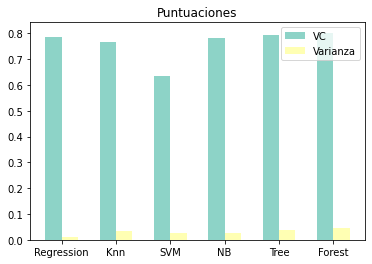

In [109]:
width = 0.30
ind =np.arange(6)
plt.bar(ind ,meanValidaCruz, width, label='VC')
plt.bar(ind + width,stdValidaCruz, width, label='Varianza')
#plt.bar(ind + width*2,score, width, color='r', label='Score')
plt.xticks(ind + width/2,('Regression', 'Knn', 'SVM', 'NB', 'Tree','Forest'))
plt.legend()
plt.title("Puntuaciones")



> Ahora que se conoce la precisión de cada modelo se debe mejorar las puntuaciones obtenidas. Como los modelos Random Forest y Árbol de decisión presentaron los mejores resultados, se optimizaran dichos modelos. Para lo cual se usara la librería GridSearchCV de Sklearn que nos permite encontrar los mejores parámetros para implementar los algoritmos.

## **Mejorar los resultados**

In [111]:
#GirdSearchCV con el modelo de árbol de decisión

from sklearn.model_selection import GridSearchCV #Importar la librería

minSplit = np.arange(20,26,1)
maxDepth = np.arange(4.0,4.6,0.1)

parametros = [{'criterion': ['gini'],'max_depth': [3.5,4.1], 'min_samples_split': minSplit},
              {'criterion': ['entropy'], 'max_depth':  [3.5,4.1], 'min_samples_split':  minSplit}
             ] #Se definen los parametros para que la librería indique cuál es el mejor

gridSearch = GridSearchCV(estimator = clasificadorTree, 
                          param_grid = parametros,
                          scoring = 'accuracy',
                          cv = 10) #En el constructor se pasa el modelo que se quiere mejorar, los parametros, medida de calificacion y nuemero de pruebas.

gridSearch = gridSearch.fit(x_train, y_train) #Entrenar el GridSearchCV
print(gridSearch.best_score_) #Se ve como la puntuación cv pasó de 0.7924 a  0.8215
print(gridSearch.best_params_) #Se muestran los parametros más optimos


#Aplicacion de parametros
clasificadorTree = DecisionTreeClassifier(criterion= 'gini', 
                                          max_depth= 4.1,min_samples_split = 21,
                                          random_state = 0)

clasificadorTree.fit(x_train, y_train) #Entrenar el modelo con los datos de entrenamiento 

y_pred = clasificadorTree.predict(x_test) #Hacer predicciones sobre el conjunto de test

scoreTreeGS = clasificadorTree.score(x_train, y_train) #Obtener la precisión del algoritmo
print('Precisión de algoritmo de Decision Tree: ',scoreTreeGS)

cv = cross_val_score(estimator = clasificadorTree, X = x_train, y = y_train, cv = 10) #Metodo para obtener la precisión
cvTreeGS = cv.mean()
stdTreeGS = cv.std()
print("Promedio Validación cruzada Decision Tree: ", cvTreeGS)
print('Varianza de Decision Tree: ',stdTreeGS)

0.8215480649188514
{'criterion': 'gini', 'max_depth': 4.1, 'min_samples_split': 21}
Precisión de algoritmo de Decision Tree:  0.8271604938271605
Promedio Validación cruzada Decision Tree:  0.8215480649188514
Varianza de Decision Tree:  0.03808522872453622


In [112]:
#Cuadro comparativo de resultados
defectpVsGSTree = pd.DataFrame({'Parametros. Árbol de Decisión':['Por Defecto', 'GridSearchCV'],
                                'Mean Vali. Cruz.':[cvTree,cvTreeGS ],
                                'Varianza': [stdTree, stdTreeGS]})

defectpVsGSTree



,Parametros. Árbol de Decisión,Mean Vali. Cruz.,Varianza
0,Por Defecto,0.792472,0.037515
1,GridSearchCV,0.821548,0.038085


In [113]:
#GirdSearchCV con el modelo de bosques aleatorios

nEstimators = np.arange(80,86)
maxDepth = np.arange(4.0,4.3,0.1)

#best'max_features': ['auto'],
#best'criterion' :['entropy']
parametros = { 
    'n_estimators': nEstimators,
    'max_depth' :  maxDepth,
}#Se definen los parametros para que la librería indique cuál es el mejor

gridSearch = GridSearchCV(estimator = clasificadorForest, 
                          param_grid = parametros,
                          scoring = 'accuracy',
                          cv = 10)#En el constructor se pasa el modelo que se quiere mejorar, los parametros, medida de calificacion y nuemero de pruebas.

gridSearch = gridSearch.fit(x_train, y_train) #Entrenar el GridSearch
print(gridSearch.best_score_) #Se ve como la puntuación de cv pasó de 0.8025 a 0.8237 
print(gridSearch.best_params_) #Se muestran los parametros más optimos


#Aplicación de parametros 
clasificadorForest = RandomForestClassifier(max_features ='auto',
                                            criterion = 'entropy',
                                            n_estimators = 84,
                                            max_depth =  4,
                                            random_state = 0)
clasificadorForest.fit(x_train, y_train) #Entrenar el modelo con los datos de entrenamiento 

y_pred = clasificadorForest.predict(x_test) #Hacer predicciones sobre el conjunto de test

scoreForestGS = clasificadorForest.score(x_train, y_train) #Obtener la precisión del algoritmo
print('Precisión de algoritmo de Random Forest: ',scoreForestGS)

cv = cross_val_score(estimator = clasificadorForest, X = x_train, y = y_train, cv = 10) #Otro metodo para obtener la precisión
cvForestGS = cv.mean()
stdForestGS = cv.std()
print("promedio Validación cruzada Random Forest: ", cvForestGS)
print('Varianza de Random Forest: ',stdForestGS)

0.8237827715355805
{'max_depth': 4.0, 'n_estimators': 84}
Precisión de algoritmo de Random Forest:  0.8316498316498316
promedio Validación cruzada Random Forest:  0.8226591760299626
Varianza de Random Forest:  0.03586570123415806


In [114]:
#Cuadro comparativo de resultados
defectpVsGSForest = pd.DataFrame({'Bosques Aleatorios':['Por Defecto', 'GridSearchCV'],
                                'Mean Vali. Cruz.':[cvForest,cvForestGS],
                                'Varianza': [stdForest, stdForestGS]})

defectpVsGSForest

,Bosques Aleatorios,Mean Vali. Cruz.,Varianza
0,Por Defecto,0.802597,0.044664
1,GridSearchCV,0.822659,0.035866


In [115]:
#Cuadro comparativo de modelos
modelos = pd.DataFrame({'Modelo': ['DecisionTree', 'RandomForest'],
                      'Precision': [cvTreeGS, cvForestGS],
                       'Varianza': [stdTreeGS, stdForestGS]
                      })
modelos.sort_values(by='Precision',  ascending = False)

,Modelo,Precision,Varianza
1,RandomForest,0.822659,0.035866
0,DecisionTree,0.821548,0.038085


> Con estos resultados se ha finalizado el proceso de predicción de la supervivencia de los tripulantes del titanic. En este puntose ha realizado un análisis, preprocesamiento de datos, selección, entrenamiento y optimización de modelos para la solución del problema planteado.
Se concluyo con dos modelos que presentan mejores resultados en comparación con los demás escogidos. Estos son: **El modelo de RandomForest** con una **precisión** del **82.26%** y con una **varianza** del **3.5%**. El otro **modelo** es el de **DecisionTree**, que presenta una **precisión** de **82.21%** con una **varianza** del **3.8%**.